In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

len(results)

46

In [3]:
results_dict = {}

for x in results:
	if x["Test Dataset"] == "x-ginco":
		model = x["Model"]
		cur_result = results_dict.get(model, {})
		for lang in ["Slovenian", "Croatian", "Macedonian", "Catalan", "Ukrainian", "Icelandic", "Albanian", "Turkish", "Greek", "Maltese" ]:
			cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang]["Macro F1"]
			cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang]["Micro F1"]
		results_dict[model] = cur_result
	elif x["Test Dataset"] == "en-ginco":
		model = x["Model"]
		cur_result = results_dict.get(model, {})
		for lang in ["English" ]:
			cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang]["Macro F1"]
			cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang]["Micro F1"]
		results_dict[model] = cur_result

results_df = pd.DataFrame(results_dict).transpose()
results_df.reset_index(names="Model", inplace=True)

# Rename some models
rename_dict = {
	"dummy-most_frequent": "Dummy (Most Frequent)",
	"dummy-stratified": "Dummy (Stratified)",
	"SVC": "Support Vector Machine",
	"COMPLEMENTNB": "Naive Bayes Classifier",
	"LOGISTICREGRESSION": "Logistic Regression"
	# Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),Catalan (macro-F1),Catalan (micro-F1),Ukrainian (macro-F1),...,Albanian (macro-F1),Albanian (micro-F1),Turkish (macro-F1),Turkish (micro-F1),Greek (macro-F1),Greek (micro-F1),Maltese (macro-F1),Maltese (micro-F1),English (macro-F1),English (micro-F1)
0,CORE register classifier,0.679458,0.684211,0.616019,0.632258,0.637146,0.675497,0.662264,0.641509,0.768947,...,0.708999,0.728477,0.710012,0.721088,0.715814,0.717949,0.000000,0.000000,0.592571,0.612903
1,Dummy (Most Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.020115,0.087500,0.027778,...,0.022727,0.100000,0.030220,0.137500,0.027778,0.125000,0.053156,0.228571,0.037829,0.178295
2,Dummy (Stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935,0.145844,0.139241,0.055833,...,0.097174,0.101911,0.129092,0.140127,0.111881,0.113924,0.100359,0.132353,0.101740,0.166337
3,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000,0.063194,0.138365,0.117333,...,0.023752,0.062500,0.091842,0.125786,0.095464,0.138365,0.101382,0.177419,0.458750,0.474308
4,NLI zero-shot model,0.131177,0.157143,0.118561,0.169231,0.196114,0.213333,0.168216,0.187050,0.066317,...,0.206982,0.212766,0.163951,0.202899,0.195766,0.200000,0.166301,0.250000,0.159701,0.231293
5,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500,0.076947,0.112500,0.057855,...,0.057139,0.100000,0.092951,0.137500,0.158781,0.175000,0.075048,0.200000,0.571848,0.511628
6,Naive Bayes Classifier,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522,0.099758,0.220588,0.079921,...,0.087802,0.150943,0.094049,0.125786,0.092868,0.138365,0.091683,0.100000,0.336396,0.379845
7,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000,0.063211,0.137500,0.121076,...,0.058056,0.150000,0.096146,0.125000,0.223381,0.237500,0.073413,0.071429,0.508563,0.494118
8,X-GENRE classifier,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.788146,0.787500,0.932950,...,0.854073,0.850000,0.911111,0.912500,0.802031,0.817610,0.510171,0.579710,0.751920,0.710059
9,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.827404,0.812500,0.705579,...,0.758063,0.762500,0.789993,0.787500,0.729076,0.775000,0.611206,0.771429,0.724418,0.779070


In [4]:
# Save the results

results_df.to_json("results_combined.json", orient="records", lines=True)


# Plot a bar plot

In [5]:
results_df = pd.read_json("results_combined.json", orient="records", lines=True)
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),Catalan (macro-F1),Catalan (micro-F1),Ukrainian (macro-F1),...,Albanian (macro-F1),Albanian (micro-F1),Turkish (macro-F1),Turkish (micro-F1),Greek (macro-F1),Greek (micro-F1),Maltese (macro-F1),Maltese (micro-F1),English (macro-F1),English (micro-F1)
0,CORE register classifier,0.679458,0.684211,0.616019,0.632258,0.637146,0.675497,0.662264,0.641509,0.768947,...,0.708999,0.728477,0.710012,0.721088,0.715814,0.717949,0.000000,0.000000,0.592571,0.612903
1,Dummy (Most Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.020115,0.087500,0.027778,...,0.022727,0.100000,0.030220,0.137500,0.027778,0.125000,0.053156,0.228571,0.037829,0.178295
2,Dummy (Stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935,0.145844,0.139241,0.055833,...,0.097174,0.101911,0.129092,0.140127,0.111881,0.113924,0.100359,0.132353,0.101740,0.166337
3,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000,0.063194,0.138365,0.117333,...,0.023752,0.062500,0.091842,0.125786,0.095464,0.138365,0.101382,0.177419,0.458750,0.474308
4,NLI zero-shot model,0.131177,0.157143,0.118561,0.169231,0.196114,0.213333,0.168216,0.187050,0.066317,...,0.206982,0.212766,0.163951,0.202899,0.195766,0.200000,0.166301,0.250000,0.159701,0.231293
5,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500,0.076947,0.112500,0.057855,...,0.057139,0.100000,0.092951,0.137500,0.158781,0.175000,0.075048,0.200000,0.571848,0.511628
6,Naive Bayes Classifier,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522,0.099758,0.220588,0.079921,...,0.087802,0.150943,0.094049,0.125786,0.092868,0.138365,0.091683,0.100000,0.336396,0.379845
7,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000,0.063211,0.137500,0.121076,...,0.058056,0.150000,0.096146,0.125000,0.223381,0.237500,0.073413,0.071429,0.508563,0.494118
8,X-GENRE classifier,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.788146,0.787500,0.932950,...,0.854073,0.850000,0.911111,0.912500,0.802031,0.817610,0.510171,0.579710,0.751920,0.710059
9,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.827404,0.812500,0.705579,...,0.758063,0.762500,0.789993,0.787500,0.729076,0.775000,0.611206,0.771429,0.724418,0.779070


In [6]:
# Filter out some models
#results_df = results_df[~results_df["Model"].isin(['LOGISTICREGRESSION', 'NLI zero-shot model', 'dummy-stratified', 'CORE register classifier'])]


In [7]:
print(list(results_df.Model.unique()))

['CORE register classifier', 'Dummy (Most Frequent)', 'Dummy (Stratified)', 'fastText', 'NLI zero-shot model', 'Support Vector Machine', 'Naive Bayes Classifier', 'Logistic Regression', 'X-GENRE classifier', 'Mistral Medium 3.1', 'Gemini 2.5 Flash', 'GPT-5-nano', 'GPT-4o', 'GPT-5-mini', 'GPT-3.5-Turbo', 'GPT-4o-mini', 'DeekSeek-R1', 'GaMS-Instruct 27B', 'Llama 3.3', 'Gemma 3', 'Qwen3', 'Gemini 2.5 Pro', 'GPT-5']


In [8]:
print(results_df.sort_values(by="Slovenian (macro-F1)", ascending=False).round(2).to_markdown(index=False))

| Model                    |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |   Macedonian (macro-F1) |   Macedonian (micro-F1) |   Catalan (macro-F1) |   Catalan (micro-F1) |   Ukrainian (macro-F1) |   Ukrainian (micro-F1) |   Icelandic (macro-F1) |   Icelandic (micro-F1) |   Albanian (macro-F1) |   Albanian (micro-F1) |   Turkish (macro-F1) |   Turkish (micro-F1) |   Greek (macro-F1) |   Greek (micro-F1) |   Maltese (macro-F1) |   Maltese (micro-F1) |   English (macro-F1) |   English (micro-F1) |
|:-------------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|------------------------:|------------------------:|---------------------:|---------------------:|-----------------------:|-----------------------:|-----------------------:|-----------------------:|----------------------:|----------------------:|---------------------:|---------------------:|-------------------:|--------

In [9]:
# Add a column with averages
results_df["Average"] = results_df.drop(columns=["Model"]).mean(axis=1)
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),Catalan (macro-F1),Catalan (micro-F1),Ukrainian (macro-F1),...,Albanian (micro-F1),Turkish (macro-F1),Turkish (micro-F1),Greek (macro-F1),Greek (micro-F1),Maltese (macro-F1),Maltese (micro-F1),English (macro-F1),English (micro-F1),Average
0,CORE register classifier,0.679458,0.684211,0.616019,0.632258,0.637146,0.675497,0.662264,0.641509,0.768947,...,0.728477,0.710012,0.721088,0.715814,0.717949,0.000000,0.000000,0.592571,0.612903,0.610459
1,Dummy (Most Frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.020115,0.087500,0.027778,...,0.100000,0.030220,0.137500,0.027778,0.125000,0.053156,0.228571,0.037829,0.178295,0.084420
2,Dummy (Stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935,0.145844,0.139241,0.055833,...,0.101911,0.129092,0.140127,0.111881,0.113924,0.100359,0.132353,0.101740,0.166337,0.110514
3,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000,0.063194,0.138365,0.117333,...,0.062500,0.091842,0.125786,0.095464,0.138365,0.101382,0.177419,0.458750,0.474308,0.179380
4,NLI zero-shot model,0.131177,0.157143,0.118561,0.169231,0.196114,0.213333,0.168216,0.187050,0.066317,...,0.212766,0.163951,0.202899,0.195766,0.200000,0.166301,0.250000,0.159701,0.231293,0.175935
5,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500,0.076947,0.112500,0.057855,...,0.100000,0.092951,0.137500,0.158781,0.175000,0.075048,0.200000,0.571848,0.511628,0.194035
6,Naive Bayes Classifier,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522,0.099758,0.220588,0.079921,...,0.150943,0.094049,0.125786,0.092868,0.138365,0.091683,0.100000,0.336396,0.379845,0.160227
7,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000,0.063211,0.137500,0.121076,...,0.150000,0.096146,0.125000,0.223381,0.237500,0.073413,0.071429,0.508563,0.494118,0.196773
8,X-GENRE classifier,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.788146,0.787500,0.932950,...,0.850000,0.911111,0.912500,0.802031,0.817610,0.510171,0.579710,0.751920,0.710059,0.826868
9,Mistral Medium 3.1,0.751347,0.775000,0.709176,0.737500,0.740609,0.762500,0.827404,0.812500,0.705579,...,0.762500,0.789993,0.787500,0.729076,0.775000,0.611206,0.771429,0.724418,0.779070,0.752695


<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

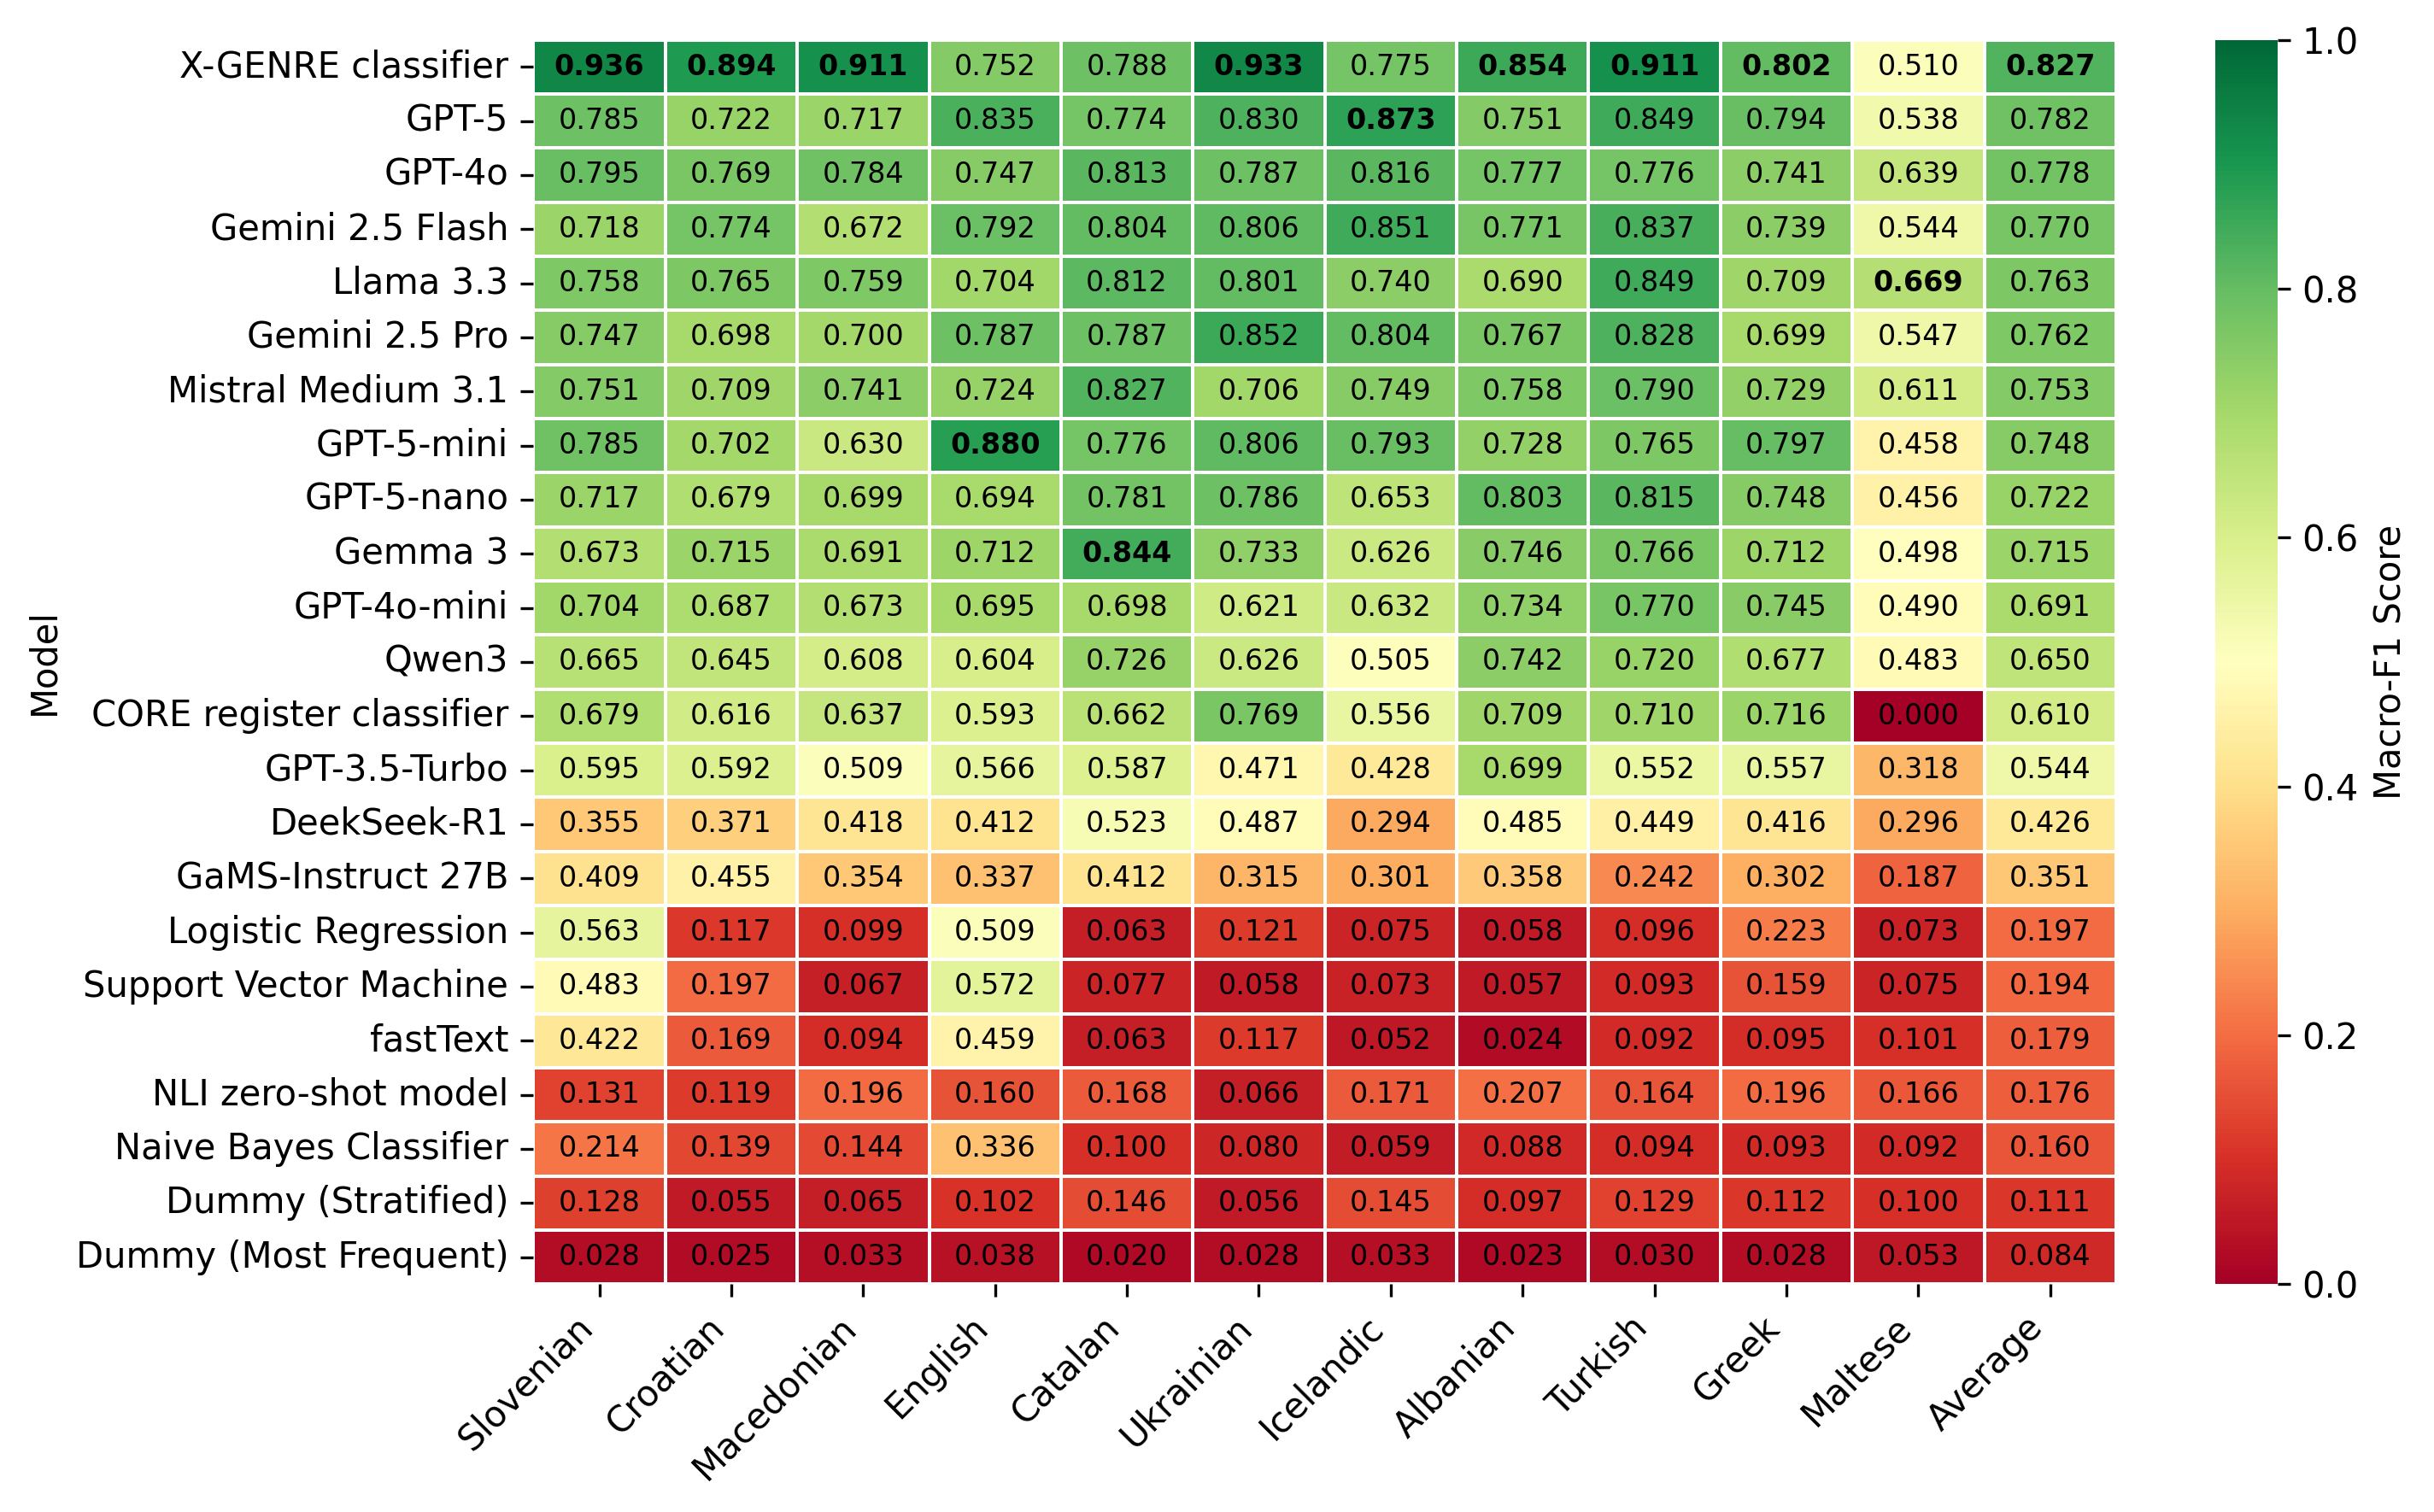

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Average", ascending=False)

data = data[['Slovenian (macro-F1)', 'Croatian (macro-F1)', 'Macedonian (macro-F1)', 'English (macro-F1)', 'Catalan (macro-F1)',  'Ukrainian (macro-F1)', 'Icelandic (macro-F1)',  'Albanian (macro-F1)', 'Turkish (macro-F1)', 'Greek (macro-F1)',  'Maltese (macro-F1)', 'Average']]

data.rename(columns={'Slovenian (macro-F1)': "Slovenian", 'Croatian (macro-F1)': "Croatian", 'Macedonian (macro-F1)':"Macedonian", 'English (macro-F1)':"English", 'Catalan (macro-F1)':"Catalan",  'Ukrainian (macro-F1)':"Ukrainian", 'Icelandic (macro-F1)':"Icelandic",  'Albanian (macro-F1)':"Albanian", 'Turkish (macro-F1)':"Turkish", 'Greek (macro-F1)':"Greek",  'Maltese (macro-F1)':"Maltese"},inplace=True)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Macro-F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("genre-results-heatmap.png", dpi=300)
plt